## Data Wrangling

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
boat = sns.load_dataset('titanic')
ba = boat
bat = boat
newboat = sns.load_dataset('titanic')

In [4]:
boat.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Simple Data Wrangling
# 1. Data Cleaning
# 1.1. Missing Values
# 1.1.1. Missing Values
# simple operation (math operator)
(boat['age'] + 1).head(10)

0    23.0
1    39.0
2    27.0
3    36.0
4    36.0
5     NaN
6    55.0
7     3.0
8    28.0
9    15.0
Name: age, dtype: float64

In [6]:
#  Where exactly  Missing Values NaN
boat.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
# Use dropna() to drop rows with missing values
boat.dropna(subset = ['deck'],axis=0, inplace = True) # this will remove the rows with missing values
# inplace = True means that the changes will be made in the original dataframe

In [8]:
# Find null values again
boat.isnull().sum()

survived        0
pclass          0
sex             0
age            19
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
deck            0
embark_town     2
alive           0
alone           0
dtype: int64

In [9]:
# Use dropna() to drop rows with missing values
boat.dropna(subset = ['age'],axis=0, inplace = True) # this will remove the rows with missing values
# inplace = True means that the changes will be made in the original dataframe

In [10]:
# Use dropna() to drop rows with missing values
boat.dropna(subset = ['embark_town'],axis=0, inplace = True) # this will remove the rows with missing values
# inplace = True means that the changes will be made in the original dataframe

In [11]:
# Find null values again
boat.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [12]:
boat.shape

(182, 15)

In [13]:
ba.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [14]:
# Find a mean 
mean = ba['age'].mean()
mean

35.62318681318681

In [15]:
# Replace missing values with the average of the column
ba['age'] = ba['age'].replace(np.nan, mean)


In [16]:
ba.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [17]:
# know the dtypes of data
boat.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [18]:
# Convert the datatype  from one to another
boat['survived'] = boat['survived'].astype("float64")
boat.dtypes

survived        float64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [19]:
# here we will convert the age into days instead of years
ba['age'] = ba['age']*365
ba.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1.0,1,female,13870.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1.0,1,female,12775.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0.0,1,male,19710.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1.0,3,female,1460.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1.0,1,female,21170.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
21,1.0,2,male,12410.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
23,1.0,1,male,10220.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
27,0.0,1,male,6935.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
52,1.0,1,female,17885.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
54,0.0,1,male,23725.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False


In [20]:
# always rename afterwards
ba.rename(columns={'age':'age_days'}, inplace=True)
ba.head()

,survived,pclass,sex,age_days,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1.0,1,female,13870.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1.0,1,female,12775.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0.0,1,male,19710.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1.0,3,female,1460.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1.0,1,female,21170.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


## Data Normilzation
<li> Uniform the Data</li>
<li> making user they same impact</li>


In [21]:
# Data Normalization
boat.head()

,survived,pclass,sex,age_days,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1.0,1,female,13870.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1.0,1,female,12775.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0.0,1,male,19710.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1.0,3,female,1460.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1.0,1,female,21170.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [22]:
bat = boat[["age_days", "fare"]]
bat.head()

,age_days,fare
1,13870.0,71.2833
3,12775.0,53.1000
6,19710.0,51.8625
10,1460.0,16.7000
11,21170.0,26.5500


In [23]:
# Simple Feature min and max scalling
bat['fare'] = bat['fare']/bat['fare'].max()
bat['age_days'] = bat['age_days']/bat['age_days'].max()
bat.head()


C:\Users\User\AppData\Local\Temp/ipykernel_9240/3662989629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bat['fare'] = bat['fare']/bat['fare'].max()
C:\Users\User\AppData\Local\Temp/ipykernel_9240/3662989629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bat['age_days'] = bat['age_days']/bat['age_days'].max()


,age_days,fare
1,0.4750,0.139136
3,0.4375,0.103644
6,0.6750,0.101229
10,0.0500,0.032596
11,0.7250,0.051822


In [24]:
# min and max method
bat['fare'].min()
bat['fare'].max()
bat.head()

,age_days,fare
1,0.4750,0.139136
3,0.4375,0.103644
6,0.6750,0.101229
10,0.0500,0.032596
11,0.7250,0.051822


In [25]:
# Z-score normalization
# Z-score normalization is a simple method of normalizing data.
# It is a common method of normalizing data to reduce the influence of outliers.
# Z-score normalization is a simple method of normalizing data.
bat['fare'] = (bat['fare'] - bat['fare'].mean())/bat['fare'].std()
bat.head()

C:\Users\User\AppData\Local\Temp/ipykernel_9240/3641809047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bat['fare'] = (bat['fare'] - bat['fare'].mean())/bat['fare'].std()


,age_days,fare
1,0.4750,-0.099835
3,0.4375,-0.337554
6,0.6750,-0.353732
10,0.0500,-0.813428
11,0.7250,-0.684654


In [26]:
newboat.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
# log transformation
# log transformation is a simple method of normalizing data.
# It is a common method of normalizing data to reduce the influence of outliers.
# log transformation is a simple method of normalizing data.
newboat['fare'] = np.log(newboat['fare']) 
newboat.head()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


## Binning

In [28]:
# binning the data  group by age
#bins = np.linespace(min(boat['age_days']), max(boat['age_days']), 15000)
#age_group = ["Bachy", "Jawan", "Boorhay"]
#boat['age_days'] = pd.cut(boat['age_days'], bins, labels=age_group, include_lowest=True)
#boat['age_days'].head()

In [29]:
# Convert categorical data to dummies
pd.get_dummies(boat['sex'])

,female,male
1,1,0
3,1,0
6,0,1
10,1,0
11,1,0
...,...,...
871,1,0
872,0,1
879,1,0
887,1,0


<AxesSubplot:xlabel='fare', ylabel='age_days'>

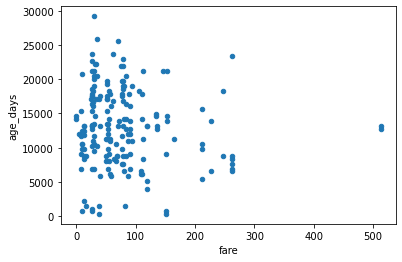

In [35]:
# Create a grapgh of the  all fare
boat.plot.scatter(x='fare', y='age_days')


<AxesSubplot:xlabel='fare'>

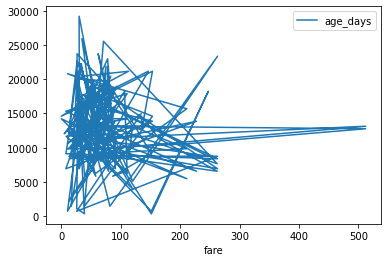

In [38]:
# Create a Line plots
boat.plot.line(x='fare', y='age_days')

In [40]:
# Create a pie chart